# Redes Neuronales Convolucionales

## Importar Librerías

In [63]:
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import files
import cv2
import pandas as pd
import zipfile 
import io
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
plt.style.use('seaborn-white')
plt.rcParams.update({'font.size':14})
!pip install -q scikit-plot
import scikitplot as skplt

## Importar Imágenes

In [64]:
def load_data(path):
  images = []
  labels = []
  for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    images.append(img)
    labels.append(int(filename[0]))
  images = np.array(images)
  labels = np.array(labels)
  return images, labels

def show_images(images, labels, size):
  plt.figure(figsize=(10, 10))
  for i in range(size**2):
    plt.subplot(size, size, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(labels[i])
  plt.show()

In [65]:
#uploaded = files.upload()
#data = zipfile.ZipFile(io.BytesIO(uploaded['64x64_SIGNS.zip']), 'r')
#data.extractall()

In [66]:
train_path = '/content/64x64_SIGNS/train_signs'
val_path = '/content/64x64_SIGNS/val_signs'
test_path = '/content/64x64_SIGNS/test_signs'
image_size = 64

In [67]:
train_images, train_labels = load_data(train_path)
val_images, val_labels = load_data(val_path)
test_images, test_labels = load_data(test_path)

Imágenes de Entrenamiento


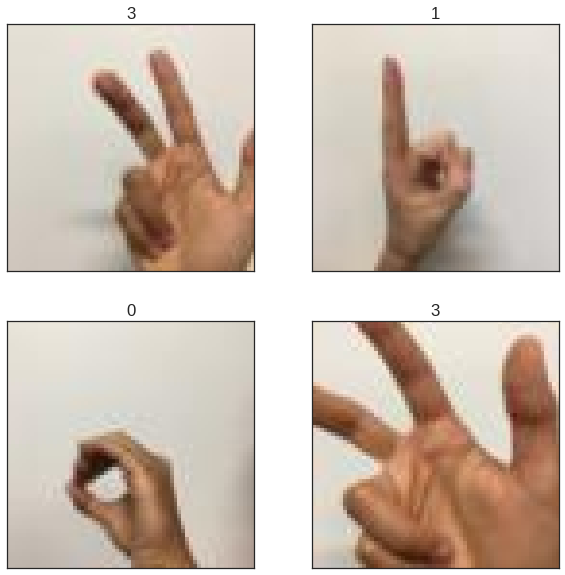

In [68]:
print('Imágenes de Entrenamiento')
show_images(train_images, train_labels, 2)

### Normalización de los atributos

In [69]:
train_images = train_images/255
val_images = val_images/255
test_images = test_images/255

## Creación de las arquitecturas de CNN

### Arquitectura 1

In [70]:
cnn_1 = models.Sequential([
  layers.Conv2D(filters=60, kernel_size=7, activation='relu',
                padding='same', input_shape=[image_size, image_size, 3]),
  layers.MaxPooling2D(2),
  layers.Conv2D(filters=120, kernel_size=3, activation='relu', padding='same'),
  layers.Conv2D(filters=120, kernel_size=3, activation='relu', padding='same'),
  layers.MaxPooling2D(2),
  layers.Conv2D(filters=240, kernel_size=3, activation='relu', padding='same'),
  layers.Conv2D(filters=240, kernel_size=3, activation='relu', padding='same'),
  layers.MaxPooling2D(2),
  layers.Flatten(),
  layers.Dense(60, activation='relu'),
  layers.Dense(60, activation='relu'),
  layers.Dense(60, activation='relu'),
  layers.Dense(6, 'softmax')
])
cnn_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 64, 64, 60)        8880      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 60)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 120)       64920     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 120)       129720    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 120)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 240)       259440    
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 240)      

### Arquitectura 2

In [71]:
cnn_2 = models.Sequential([
  layers.Conv2D(filters=80, kernel_size=7, activation='relu', 
                padding='same', input_shape=[image_size, image_size, 3]),
  layers.MaxPooling2D(2),
  layers.Conv2D(filters=160, kernel_size=5, activation='relu', padding='same'),
  layers.MaxPooling2D(2),
  layers.Conv2D(filters=320, kernel_size=5, activation='relu', padding='same'),
  layers.MaxPooling2D(2),
  layers.Flatten(),
  layers.Dense(120, activation='relu'),
  layers.Dense(60, activation='relu'),
  layers.Dense(6, 'softmax'),
])
cnn_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 64, 64, 80)        11840     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 32, 32, 80)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 160)       320160    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 160)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 320)       1280320   
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 320)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 20480)            

### Arquitectura 3

In [72]:
cnn_3 = models.Sequential([
  layers.Conv2D(filters=80, kernel_size=7, activation='relu', 
                padding='same', input_shape=[image_size, image_size, 3], kernel_initializer='he_normal'),
  layers.MaxPooling2D(2),
  layers.Conv2D(filters=160, kernel_size=5, activation='relu', padding='same', kernel_initializer='he_normal'),
  layers.MaxPooling2D(2),
  layers.Conv2D(filters=320, kernel_size=5, activation='relu', padding='same', kernel_initializer='he_normal'),
  layers.MaxPooling2D(2),
  layers.Flatten(),
  layers.Dense(120, activation='relu', kernel_initializer='he_normal'),
  layers.Dense(60, activation='relu', kernel_initializer='he_normal'),
  layers.Dense(6, 'softmax'),
])
cnn_3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 64, 64, 80)        11840     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 32, 32, 80)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 160)       320160    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 160)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 320)       1280320   
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 320)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 20480)            

## Entrenamiento de las CNNs

### Arquitectura 1

In [73]:
cnn_1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    metrics=['accuracy'])
history_1 = cnn_1.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
27/27 [==============================] - 1s 27ms/step - loss: 1.8058 - accuracy: 0.1635 - val_loss: 1.7917 - val_accuracy: 0.1806
Epoch 2/15
27/27 [==============================] - 0s 19ms/step - loss: 1.7919 - accuracy: 0.1578 - val_loss: 1.7922 - val_accuracy: 0.1435
Epoch 3/15
27/27 [==============================] - 0s 18ms/step - loss: 1.7916 - accuracy: 0.1912 - val_loss: 1.7923 - val_accuracy: 0.1435
Epoch 4/15
27/27 [==============================] - 1s 19ms/step - loss: 1.7915 - accuracy: 0.1847 - val_loss: 1.7925 - val_accuracy: 0.1435
Epoch 5/15
27/27 [==============================] - 0s 18ms/step - loss: 1.7924 - accuracy: 0.1533 - val_loss: 1.7923 - val_accuracy: 0.1435
Epoch 6/15
27/27 [==============================] - 0s 18ms/step - loss: 1.7915 - accuracy: 0.1840 - val_loss: 1.7926 - val_accuracy: 0.1435
Epoch 7/15
27/27 [==============================] - 0s 18ms/step - loss: 1.7921 - accuracy: 0.1666 - val_loss: 1.7927 - val_accuracy: 0.1435
Epoch 8/15
27

### Arquitectura 2

In [74]:
cnn_2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    metrics=['accuracy'])
history_2 = cnn_2.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
27/27 [==============================] - 1s 27ms/step - loss: 1.8472 - accuracy: 0.1704 - val_loss: 1.7941 - val_accuracy: 0.1667
Epoch 2/15
27/27 [==============================] - 1s 22ms/step - loss: 1.7946 - accuracy: 0.1771 - val_loss: 1.7846 - val_accuracy: 0.2083
Epoch 3/15
27/27 [==============================] - 1s 22ms/step - loss: 1.7734 - accuracy: 0.2336 - val_loss: 1.6694 - val_accuracy: 0.3657
Epoch 4/15
27/27 [==============================] - 1s 22ms/step - loss: 1.6949 - accuracy: 0.3120 - val_loss: 1.4654 - val_accuracy: 0.4861
Epoch 5/15
27/27 [==============================] - 1s 22ms/step - loss: 1.5488 - accuracy: 0.3978 - val_loss: 1.1824 - val_accuracy: 0.5556
Epoch 6/15
27/27 [==============================] - 1s 23ms/step - loss: 1.1100 - accuracy: 0.5523 - val_loss: 0.9999 - val_accuracy: 0.6435
Epoch 7/15
27/27 [==============================] - 1s 23ms/step - loss: 0.9535 - accuracy: 0.6519 - val_loss: 1.1619 - val_accuracy: 0.5139
Epoch 8/15
27

### Arquitectura 3

In [75]:
cnn_3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    metrics=['accuracy'])
history_3 = cnn_3.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
27/27 [==============================] - 1s 28ms/step - loss: 3.9845 - accuracy: 0.1560 - val_loss: 1.7820 - val_accuracy: 0.1713
Epoch 2/15
27/27 [==============================] - 1s 22ms/step - loss: 1.7719 - accuracy: 0.2212 - val_loss: 1.3870 - val_accuracy: 0.4537
Epoch 3/15
27/27 [==============================] - 1s 23ms/step - loss: 1.2431 - accuracy: 0.5062 - val_loss: 0.8916 - val_accuracy: 0.6389
Epoch 4/15
27/27 [==============================] - 1s 23ms/step - loss: 0.7287 - accuracy: 0.7518 - val_loss: 0.6632 - val_accuracy: 0.7685
Epoch 5/15
27/27 [==============================] - 1s 22ms/step - loss: 0.4318 - accuracy: 0.8597 - val_loss: 0.3119 - val_accuracy: 0.8843
Epoch 6/15
27/27 [==============================] - 1s 23ms/step - loss: 0.2693 - accuracy: 0.9112 - val_loss: 0.3282 - val_accuracy: 0.8889
Epoch 7/15
27/27 [==============================] - 1s 23ms/step - loss: 0.1408 - accuracy: 0.9463 - val_loss: 0.2339 - val_accuracy: 0.9306
Epoch 8/15
27

## Visualización de las curvas de aprendizaje

In [76]:
def plot_results(histories, metric, label):
  fig, ax = plt.subplots(2, 1, sharex='all', figsize=(6, 8))
  x = range(1, 16)
  for i, history in enumerate(histories):
    ax[0].plot(x, history.history[metric], '-+', label=f'CNN {i+1}')
    ax[0].set_ylabel(metric)
    ax[0].set_title('training set')
    ax[0].grid(True)
    ax[1].plot(x, history.history['val_'+metric], '-+', label=f'CNN {i+1}')
    ax[1].set_ylabel(metric)
    ax[1].set_title('validation set')
    ax[1].grid(True)
  ax[0].legend()
  ax[1].legend()
  ax[1].set_xlabel('epoch')
  plt.show()

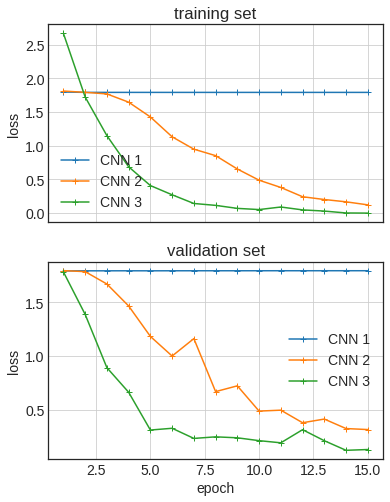

In [77]:
histories = [history_1, history_2, history_3]
plot_results(histories, 'loss', 'training loss')

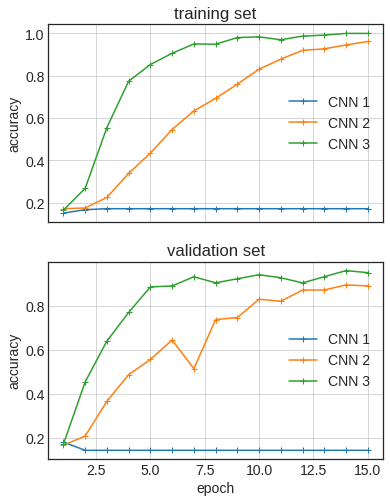

In [78]:
plot_results(histories, 'accuracy', 'validation loss')

## Comparación de las CNNs utilizando el conjunto de prueba

In [79]:
def get_accuracy(CNNs, test_images, test_labels):
  accuracy_scores = {}
  f1_scores = {}
  for i, cnn in enumerate(CNNs):
    pred_labels = cnn.predict_classes(test_images)
    accuracy_scores[f'CNN {i+1}'] = accuracy_score(test_labels, pred_labels)
    f1_scores[f'CNN {i+1}'] = f1_score(test_labels, pred_labels, average='macro')
  plt.figure(figsize=(6, 8))
  print('*'*50)
  print(accuracy_scores)
  print('*'*50)
  plt.bar(accuracy_scores.keys(), accuracy_scores.values())
  plt.ylabel('accuracy')
  plt.title('accuracy on test set')
  plt.grid(True)
  plt.show()
  plt.figure(figsize=(6, 8))
  print('*'*50)
  print(f1_scores)
  print('*'*50)
  plt.bar(f1_scores.keys(), f1_scores.values())
  plt.ylabel('f1 scores')
  plt.title('f1 scores on test set')
  plt.grid(True)
  plt.show()
def confusion_matrices(CNNs, test_images, test_labels):
  for i, cnn in enumerate(CNNs):
    pred_labels = cnn.predict_classes(test_images)
    skplt.metrics.plot_confusion_matrix(test_labels, pred_labels, title=f'CNN {i+1}', normalize=True)
    plt.show()
CNNs = [cnn_1, cnn_2, cnn_3]

### Accuracy - F1 scores

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


**************************************************
{'CNN 1': 0.16666666666666666, 'CNN 2': 0.9083333333333333, 'CNN 3': 0.9416666666666667}
**************************************************


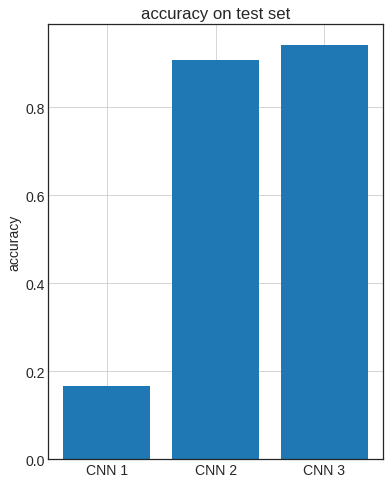

**************************************************
{'CNN 1': 0.047619047619047616, 'CNN 2': 0.9082535137092261, 'CNN 3': 0.9415779128872838}
**************************************************


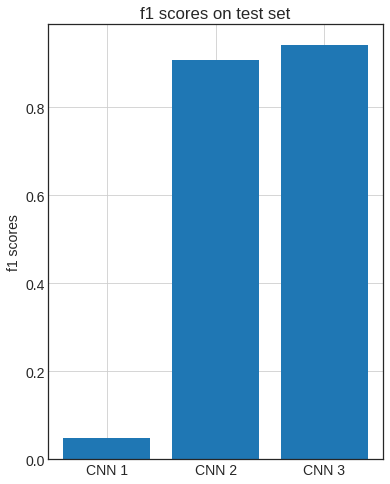

In [80]:
get_accuracy(CNNs, test_images, test_labels)

### Confusion Matrix

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


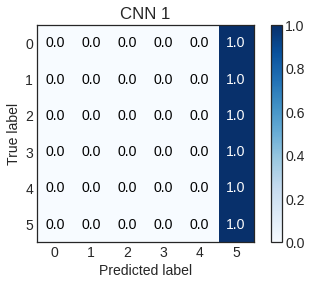

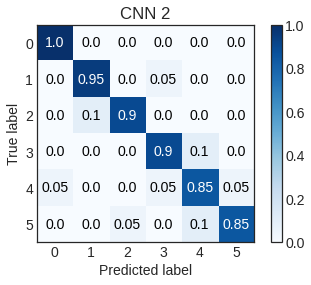

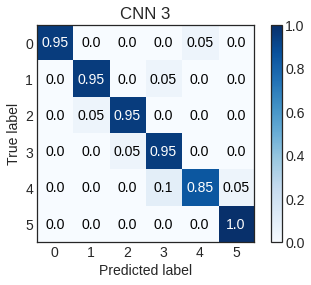

In [81]:
confusion_matrices(CNNs, test_images, test_labels)

## Elección de la Mejor CNN

In [82]:
cnn_3.save('cnn_3.h5')